In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [5]:
house_price_dataset=pd.read_csv('HousingData.csv')

In [6]:
house_price_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
#check for null values
house_price_dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
#remove the null values
house_price_dataset['CRIM'].fillna(value=house_price_dataset['CRIM'].mode()[0],inplace=True)
house_price_dataset['ZN'].fillna(value=house_price_dataset['ZN'].mode()[0],inplace=True)
house_price_dataset['INDUS'].fillna(value=house_price_dataset['INDUS'].mode()[0],inplace=True)
house_price_dataset['CHAS'].fillna(value=house_price_dataset['CHAS'].mode()[0],inplace=True)
house_price_dataset['AGE'].fillna(value=house_price_dataset['AGE'].mode()[0],inplace=True)                    
house_price_dataset['LSTAT'].fillna(value=house_price_dataset['LSTAT'].mode()[0],inplace=True)

In [9]:
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
house_price_dataset.shape

(506, 14)

In [11]:
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.469705,10.768775,11.361304,0.067194,0.554695,6.284634,69.762846,3.795043,9.549407,408.237154,18.455534,356.674032,12.464229,22.532806
std,8.574515,23.025124,6.837487,0.250605,0.115878,0.702617,28.118032,2.105710,8.707259,168.537116,2.164946,91.294864,7.121443,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.068907,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,6.590000,17.025000
50%,0.224635,0.000000,9.900000,0.000000,0.538000,6.208500,79.050000,3.207450,5.000000,330.000000,19.050000,391.440000,10.925000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,94.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
#constructing heatmap to understand correlation
correlation = house_price_dataset.corr()

<Axes: >

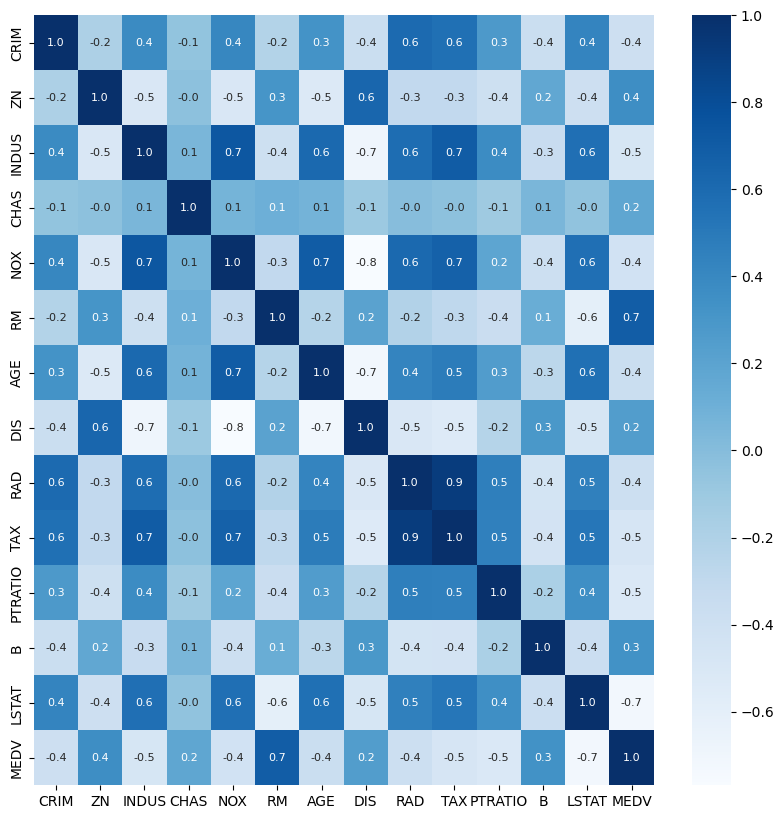

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [17]:
#splitting data and target
x=house_price_dataset.drop(['MEDV'],axis=1)
y=house_price_dataset['MEDV']

In [18]:
#splitting the data into training and test data
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
print(x.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


In [23]:
#loading the model
model=LinearRegression()

In [24]:
#train the model
model.fit(X_train,Y_train)

LinearRegression()

In [25]:
#evaluation
#prediction of training data
training_data_prediction=model.predict(X_train)

In [26]:
print(training_data_prediction)

[24.78949633 23.08404934 20.35964357 30.62280634 13.36371156 12.09187861
 20.59744668 11.24069284 12.97677217 22.80632297 16.14807686 11.95597608
 32.58004144 24.49147148 30.06528777 19.07858373 24.12430473 23.87861069
 30.89405026 18.65530696 32.9918279   4.65109778 41.37502183 24.26091953
 20.35303744 23.32138816 21.78631299 24.85029741 22.38422012 33.51125216
 25.3435582   8.32888993 17.61618157 11.17079718 20.26711429 20.47241192
 19.29990493 24.86995556 14.31828863 17.56264868 24.74173046 28.1792925
 16.90784017 23.12685139 12.37408916 11.73468385 27.53638801 19.88450439
 45.39210776 16.98708195 21.87654345 33.41675401 20.45681025 19.05321345
 20.98960522 21.45018831 27.18180395 33.09780206 25.38930605 31.44661928
 20.93167192 41.47712089 15.75169044  7.83821163 23.11860751 14.04195764
 28.24791401 17.3526957  26.38671759 39.14684079 35.11444173 35.58769603
 22.24476949 28.86408952 25.04138015 42.37720559 19.30135526 22.28532718
 17.24893895 27.45560303 33.50270149 25.53390478 25.

In [27]:
#R squared error
score_1=metrics.r2_score(Y_train,training_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

print('R squared error-',score_1)

print('mean absolute error-',score_2)

R squared error- 0.7202378563491385
mean absolute error- 3.4059142319907316


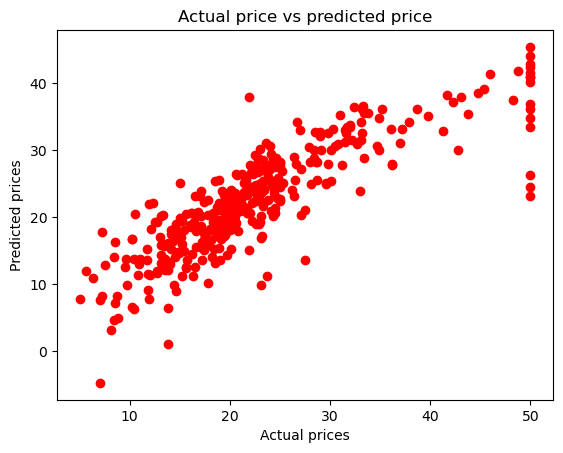

In [36]:

#visualize actual and predicted prices
plt.scatter(Y_train,training_data_prediction,color='red')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title('Actual price vs predicted price')
plt.show()

In [37]:
#Prediction on test data
test_data_prediction=model.predict(X_test)
#R squared error
score_1=metrics.r2_score(Y_test,test_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

print('R squared error-',score_1)

print('mean absolute error-',score_2)


R squared error- 0.769559722075291
mean absolute error- 3.129239826848208
